In [19]:
from google.colab import drive
import os

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
base_dir = '/content/drive/MyDrive/CNN'
!ls "/content/drive/MyDrive/CNN"

bahan  latih  validasi


In [21]:
bahan_dir = os.path.join(base_dir, 'bahan')
train_dir = os.path.join(base_dir, 'latih')
validation_dir = os.path.join(base_dir, 'validasi')

In [22]:
chihuahua_dir = os.path.join(bahan_dir, 'chihuahua/')
muffin_dir = os.path.join(bahan_dir, 'muffin/')

print("Jumlah Data Train Setiap Kelas")
print('Jumlah gambar chihuahua :', len(os.listdir(chihuahua_dir)))
print('Jumlah gambar muffin :', len(os.listdir(muffin_dir)))

Jumlah Data Train Setiap Kelas
Jumlah gambar chihuahua : 115
Jumlah gambar muffin : 115


In [23]:
train_chihuahua = os.path.join(train_dir, 'chihuahua/')
train_muffin = os.path.join(train_dir, 'muffin/')

validation_chihuahua = os.path.join(validation_dir, 'chihuahua/')
validation_muffin = os.path.join(validation_dir, 'muffin/')

In [24]:
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(total_size * train_ratio)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destanation = train + i
    copyfile(i_file, destanation)

  for i in val_files:
    i_file = source + i
    destanation = val + i
    copyfile(i_file, destanation)

train_ratio = 0.9

source_00 = chihuahua_dir
train_00 = train_chihuahua
val_00 = validation_chihuahua
train_val_split(source_00, train_00, val_00, train_ratio)

source_01 = muffin_dir
train_01 = train_muffin
val_01 = validation_muffin
train_val_split(source_01, train_01, val_01, train_ratio)

In [25]:
print('Jumlah All chihuahua    :', len(os.listdir(chihuahua_dir)))
print('Jumlah Train chihuahua  :', len(os.listdir(train_chihuahua)))
print('Jumlah Val chihuahua    :', len(os.listdir(validation_chihuahua)))

Jumlah All chihuahua    : 115
Jumlah Train chihuahua  : 115
Jumlah Val chihuahua    : 74


In [26]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range= 30,
                horizontal_flip= True,
                shear_range= 0.3,
                fill_mode= 'nearest',
                width_shift_range= 0.2,
                height_shift_range= 0.2,
                zoom_range= 0.1
)

val_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range= 30,
                horizontal_flip= True,
                shear_range= 0.3,
                fill_mode= 'nearest',
                width_shift_range= 0.2,
                height_shift_range= 0.2,
                zoom_range= 0.1
)

In [28]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

Found 230 images belonging to 2 classes.
Found 144 images belonging to 2 classes.


In [29]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print('\Akurasi mencapai 99%')
      self.model.stop_training = True

callbacks = myCallback()

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3, seed=112),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5, seed=112),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 200)                 │       3,699,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 500)                 │         100,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,824,486 (14.59 MB)

 Trainable params: 3,824,486 (14.59 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [33]:
history = model.fit(
    train_generator,
    steps_per_epoch = 9,
    epochs = 25,
    validation_data = val_generator,
    validation_steps = 1,
    verbose = 1,
    callbacks = [callbacks]
)

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 752ms/step - accuracy: 0.4651 - loss: 0.8906 - val_accuracy: 0.7000 - val_loss: 0.6646
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 362ms/step - accuracy: 0.6231 - loss: 0.6802 - val_accuracy: 0.8000 - val_loss: 0.6527
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step - accuracy: 0.7046 - loss: 0.6627 - val_accuracy: 0.6000 - val_loss: 0.6315
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 579ms/step - accuracy: 0.6993 - loss: 0.5771 - val_accuracy: 0.8000 - val_loss: 0.4467
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 434ms/step - accuracy: 0.7629 - loss: 0.5752 - val_accuracy: 0.9000 - val_loss: 0.4642
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - accuracy: 0.6861 - loss: 0.5917 - val_accuracy: 0.9000 - val_loss: 0.4688
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 367ms/step - accuracy: 0.7287 - loss: 0.5242 - val_accuracy: 0.8000 - val_loss: 0.3765
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 577ms/step - accuracy: 0.7443 - loss: 0.5444 - val_accuracy: 0.8000 - val_los

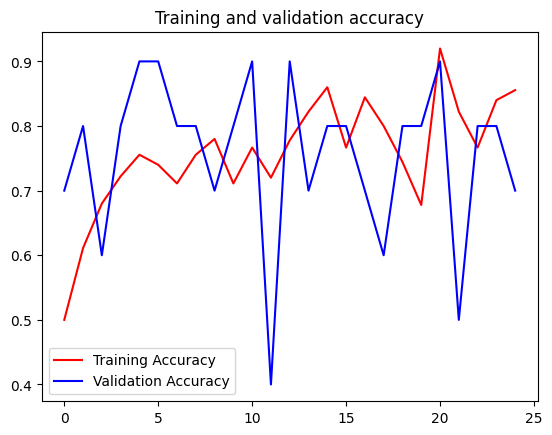

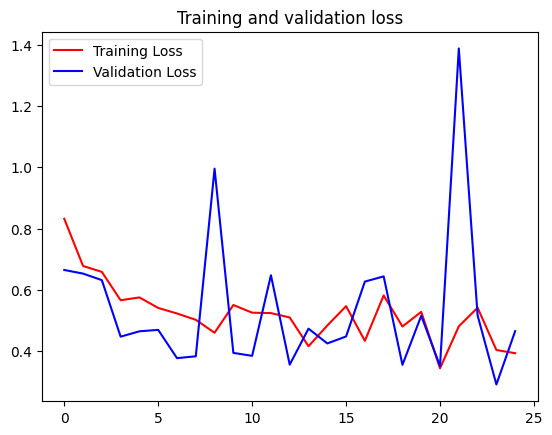

In [34]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc= 'best')
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc= 'best')
plt.show()

Saving img_0_50.jpg to img_0_50.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
img_0_50.jpg
This image belongs to chihuahua


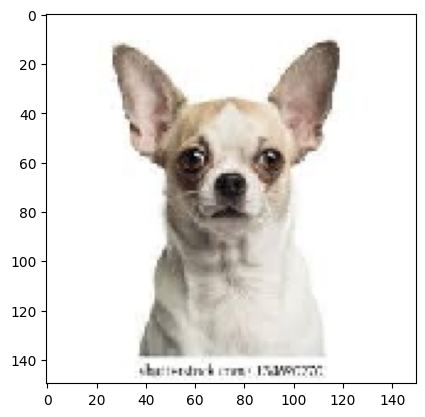

In [36]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0] == 1. :
    print('This image belongs to chihuahua')
  else:
    print('This image belongs to muffin')

  class_list = os.listdir(train_dir)